In [10]:
# read /home/s94zalek_hpc/shape_matching/data/data_transmatch/datasets/shrec19/SHREC19_matching_humans/mat/1.mat

import scipy.io

mat = scipy.io.loadmat('/home/s94zalek_hpc/shape_matching/data/data_transmatch/datasets/shrec19/SHREC19_matching_humans/mat/1.mat')

verts = mat['Shape_df'][0][0][0]
faces = mat['Shape_df'][0][0][1]
corr = mat['smpl_matches']

print('verts.shape:', verts.shape)
print('faces.shape:', faces.shape)
print('corr.shape:', corr.shape)

verts.shape: (4706, 3)
faces.shape: (9408, 3)
corr.shape: (6890, 1)


In [11]:
corr

array([[3043],
       [3044],
       [2943],
       ...,
       [4311],
       [4311],
       [4311]], dtype=uint16)

In [12]:
print(corr.min(), corr.max())

1 4706


In [13]:
import os
import numpy as np
import trimesh
from tqdm import tqdm
import shutil

mat_dir = '/home/s94zalek_hpc/shape_matching/data/data_transmatch/datasets/shrec19/SHREC19_matching_humans/mat/'
off_dir = '/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_original/off'
corr_dir = '/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_original/corres'

shutil.rmtree(off_dir, ignore_errors=True)
shutil.rmtree(corr_dir, ignore_errors=True)

os.makedirs(off_dir, exist_ok=True)
os.makedirs(corr_dir, exist_ok=True)

ply_dir = '/home/s94zalek_hpc/shape_matching/data/data_transmatch/datasets/shrec19/origin_shrec/mat'

for file in tqdm(sorted(os.listdir(mat_dir))):
    if file.endswith('.mat'):
        mat = scipy.io.loadmat(mat_dir + file)

        # verts = mat['Shape_df'][0][0][0]
        # faces = mat['Shape_df'][0][0][1]
        corr = mat['smpl_matches'].flatten()

        # mesh = trimesh.Trimesh(vertices=verts, faces=faces, process=False)
        mesh = trimesh.load_mesh(ply_dir + '/' + file[:-4] + '.ply')
        mesh.export(off_dir + '/' + file[:-4] + '.off')
        
        
        np.savetxt(corr_dir + '/' + file[:-4] + '.vts', corr, fmt='%d')
        # with open(corr_dir + '/' + file[:-4] + '.vts', 'w') as f:
        #     np.savetxt(f, corr, fmt='%d')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:08<00:00,  5.23it/s]


In [7]:
import trimesh
import numpy as np

scene = trimesh.Scene()

In [ ]:
# read tr_reg_000.off from each folder and plot it
# load the mesh from the original folder

scene.geometry.clear()

shrec19_orig_folder = '/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_original/off'
shrec19_remeshed_folder = '/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_r/off'
corr_path = '/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_original/corres'

corr = np.loadtxt(corr_path  + '/32.vts').astype(int) - 1


mesh_orig = trimesh.load(shrec19_orig_folder + '/32.off', process=True)
# mesh_orig.faces -= 1
# mesh_orig = trimesh.load('/home/s94zalek_hpc/shape_matching/data/data_transmatch/datasets/shrec19/origin_shrec/mat/12.ply')
scene.add_geometry(mesh_orig)

# load the mesh from the remeshed folder
mesh_remeshed = trimesh.load(shrec19_remeshed_folder + '/32.off', process=False)
mesh_remeshed.vertices += [1, 0, 0]  # move the remeshed mesh to the right
scene.add_geometry(mesh_remeshed)

mesh_transmatch = trimesh.load('/home/s94zalek_hpc/shape_matching/data/data_transmatch/datasets/shrec19/data/249/A.off', process=False)
mesh_transmatch.vertices += [2, 0, 0]  # move the remeshed mesh to the right
scene.add_geometry(mesh_transmatch)

# mesh_obj = trimesh.load('/home/s94zalek_hpc/shape_matching/data/SHREC19_MH/32.obj')
# mesh_obj.vertices += [3, 0, 0]  # move the remeshed mesh to the right
# scene.add_geometry(mesh_obj)

print(mesh_orig)
print(mesh_remeshed)
print(mesh_transmatch)
print(mesh_obj)

scene.show()

In [51]:
smpl_path = '/home/s94zalek_hpc/shape_matching/data/FAUST_original/off/tr_reg_001.off'
mesh_smpl = trimesh.load(smpl_path, process=False)

In [ ]:
scene.geometry.clear()

# imterpolate the color diagonally based on 0 and 2 coordinate
cmap = trimesh.visual.color.interpolate(
    mesh_orig.vertices[:, 0] / mesh_orig.vertices[:, 0].max() +\
    mesh_orig.vertices[:, 1] / mesh_orig.vertices[:, 1].max(),
    'jet')

# add the first mesh
mesh_orig.visual.vertex_colors = cmap[:len(mesh_orig.vertices)].clip(0, 255)
scene.add_geometry(mesh_orig)

mesh_smpl.vertices += [1, 0, 0]
mesh_smpl.visual.vertex_colors = cmap[corr].clip(0, 255)
scene.add_geometry(mesh_smpl)

scene.show()

In [ ]:
import my_code.datasets.preprocessing as preprocessing
import torch

i = 22

shrec_r_path = f'/home/s94zalek_hpc/shape_matching/data/SHREC19_r/off/{i}.off'
shrec_o_path = f'/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_original/off/{i}.off'
shrec_scaled_path = f'/home/s94zalek_hpc/shape_matching/data_pair_evaluation/SHREC19_original_scaled/off/{i}.off'

mesh_remeshed = trimesh.load(shrec_r_path, process=False)

mesh_orig = trimesh.load(shrec_o_path, process=False)
mesh_orig.visual.vertex_colors = np.array([255, 0, 0, 255])
# mesh_orig.vertices += [0.1, 0, 0]

mesh_scaled = trimesh.load(shrec_scaled_path, process=False)
mesh_scaled.visual.vertex_colors = np.array([0, 255, 0, 255])
# mesh_scaled.vertices += [0.2, 0, 0]



# verts_orig = preprocessing.center(
#     torch.tensor(mesh_orig.vertices)
#     )[0]

# verts_remeshed = preprocessing.center(
#     torch.tensor(mesh_remeshed.vertices)
#     )[0]

# verts_remeshed = preprocessing.scale(
#     input_verts=verts_remeshed,
#     input_faces=torch.tensor(mesh_remeshed.faces),
#     ref_verts=verts_orig,
#     ref_faces=torch.tensor(mesh_orig.faces)
# )[0]

# verts_orig += torch.tensor([0.1, 0, 0])


# mesh_orig = trimesh.Trimesh(vertices=verts_orig.numpy(), faces=mesh_orig.faces, process=False,
#                          visual=mesh_orig.visual)
# mesh_remeshed = trimesh.Trimesh(vertices=verts_remeshed.numpy(), faces=mesh_remeshed.faces, process=False)

# scene = trimesh.Scene()
scene.geometry.clear()

scene.add_geometry(trimesh.creation.axis(origin_size=0.1))

scene.add_geometry(mesh_orig)
scene.add_geometry(mesh_remeshed)
scene.add_geometry(mesh_scaled)

scene.show()

# Scale SHREC19 to remeshed

In [ ]:
import my_code.datasets.preprocessing as preprocessing
import torch
import trimesh
import os
import numpy as np
from tqdm import tqdm
from utils.fmap_util import nn_query
import shutil

shrec_orig_folder = '/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SHREC19_original/off'
shrec_new_folder = '/home/s94zalek_hpc/shape_matching/data_pair_evaluation/SHREC19_original_scaled/off'

shrec_remeshed_folder = '/home/s94zalek_hpc/shape_matching/data/SHREC19_r/off'

shutil.rmtree(shrec_new_folder, ignore_errors=True)
os.makedirs(shrec_new_folder, exist_ok=True)
    

for file_name in tqdm(sorted(os.listdir(shrec_remeshed_folder)), total=len(os.listdir(shrec_remeshed_folder))):
    
    mesh_orig = trimesh.load(shrec_orig_folder + f'/{file_name}', process=False)
    mesh_remeshed = trimesh.load(shrec_remeshed_folder + f'/{file_name}', process=False)

    verts_remeshed = preprocessing.center(
        torch.tensor(mesh_remeshed.vertices)
        )[0]

    verts_orig = preprocessing.center(
        torch.tensor(mesh_orig.vertices)
        )[0]
    
    verts_orig, area = preprocessing.scale(
        input_verts=verts_orig,
        input_faces=torch.tensor(mesh_orig.faces),
        ref_verts=verts_remeshed,
        ref_faces=torch.tensor(mesh_remeshed.faces)
    )
    print(f'Scaling {file_name} by {area}')
    
    # center again
    # verts_orig = preprocessing.center(verts_orig)[0]

    # save original mesh 
    new_mesh_orig = trimesh.Trimesh(vertices=verts_orig, faces=mesh_orig.faces)
    
    new_mesh_orig.export(shrec_new_folder + f'/{file_name}')
    

# Normalize by vertex area

In [28]:
from utils.geometry_util import laplacian_decomposition
import my_code.datasets.preprocessing as preprocessing

meshes = [
    trimesh.load(f'data/SURREAL_full/template/template.ply', process=False),
    trimesh.load(shrec_orig_folder + '/1.off', process=False),
    trimesh.load(shrec_remeshed_folder + '/1.off', process=False),
    # trimesh.load(shrec_new_folder + '/32.off', process=False)
]

scene.geometry.clear()

for i in range(len(meshes)):
    mesh = meshes[i]
    
    verts = mesh.vertices
    faces = mesh.faces

    # verts -= np.mean(verts, axis=0)
    
    verts = preprocessing.center(
    torch.tensor(verts)
    )[0].numpy()

    # normalize verts by sqrt face area
    old_sqrt_area = laplacian_decomposition(verts=verts, faces=faces, k=1)[-1]
    print(f'Old face sqrt area: {old_sqrt_area:.3f}')
    verts /= old_sqrt_area
        
    # mesh.vertices += np.array([i * 2, 0, 0])
        
    scene.add_geometry(
        trimesh.Trimesh(vertices=verts + np.array([i * 2, 0, 0]), faces=faces)
                       )
    scene.add_geometry(
        trimesh.Trimesh(vertices=verts + np.array([i * 2 + 1, 0, 0]), faces=faces)
    )
    
scene.add_geometry(trimesh.creation.axis(origin_size=0.1))
scene.show()
    
# 0 1, 2, 3, 4, 5
# save new verts and faces
# write_off(off_file, verts, faces)

Old face sqrt area: 1.331
Old face sqrt area: 1.349
Old face sqrt area: 1.000


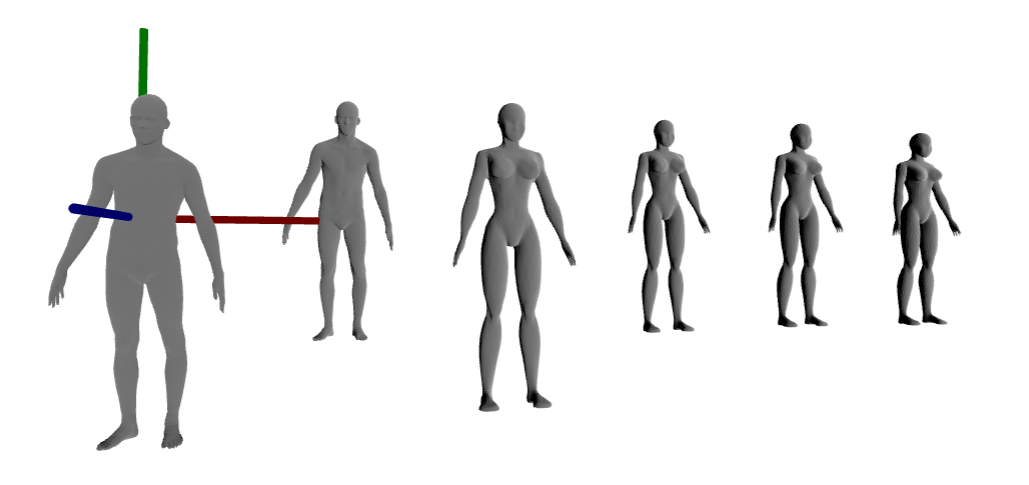